<a href="https://colab.research.google.com/github/theBuluku/The-Autolib-Super-Project/blob/master/The_Autolib_Super_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Set-Up


In [0]:
#Importing the tools to use in the project.

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Hypothesis Statement.

H0-Friday is the busiest day of the week.

#Data Display

In [134]:
#Importing/loading our data through the url method.
#Loading my dataset for analysis
url='http://bit.ly/DSCoreAutolibDataset'
autolib_dataset= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_dataset.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


Checking more information in the dataset.

In [127]:
#Giving a brief information about the dataset.
autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [128]:
#Displays all the information of all the columns.
autolib_dataset.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/6/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [129]:
#Displys names of all columns
autolib_dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [130]:
#Giving  the number of rows and columns of the dataset
print(autolib_dataset.shape)

(16085, 13)


In [131]:
print(autolib_dataset.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


#STATISTICAL OVERVIEW.

In [132]:
#The describe function returns a pandas series type that provides descriptive statistics which summarize
#the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
autolib_dataset.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#DATA CLEANING.

In [0]:
#Dropping unnecessary columns
autolib_dataset.drop(["Utilib_taken_sum", "Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","date"], axis = 1, inplace = True)


Since we are only analysing the blue cars, any column that has a different car is dropped.

In [136]:
#Displaying the remaining names of all columns
autolib_dataset.columns

Index(['Postal code', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [137]:
autolib_dataset=autolib_dataset.rename({'Postal code':'POSTAL_CODE','n_daily_data_points':'DAILY_DATA_POINTS','dayOfWeek':'DAY','day_type':'DAY_TYPE','BlueCars_taken_sum':'SUM_OF_BLUECARS_TAKEN','BlueCars_returned_sum':'SUM_OF_BLUECARS_RETURNED','Slots_freed_sum':'SUM_OF_FREED_SLOTS','Slots_taken_sum':'SUM_OF_TAKEN_SLOTS'}, axis='columns')

autolib_dataset.head()

,POSTAL_CODE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20


In [138]:
autolib_dataset.fillna(autolib_dataset.mean())
autolib_dataset.head(10)

,POSTAL_CODE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
5,75001,1437,5,weekend,187,185,38,35
6,75001,1440,6,weekend,180,180,34,34
7,75001,1438,0,weekday,84,83,14,15
8,75001,1439,1,weekday,81,84,15,15
9,75001,1440,2,weekday,88,85,23,22


In [139]:
#converting the day of the week to Monday Tuesday Wednesday Thursday and Friday for easier visualiztion
#
autolib_dataset['DAY'] = autolib_dataset.DAY.map({0:"Monday", 1:"Tuesday",2:"Wednesday",3:"Thursday", 4:"Friday"})
autolib_dataset['DAY'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: DAY, dtype: object

Replacing all null values with
the mean will ensure consistency in our dataset to avoid errors.

Checking for Outliiers.

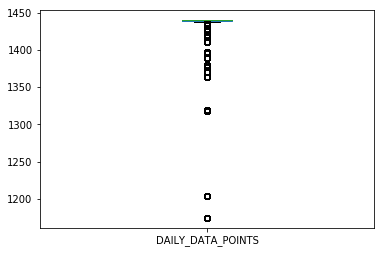

In [102]:
#checking for outliers
autolib_dataset['DAILY_DATA_POINTS'].plot(kind='box')

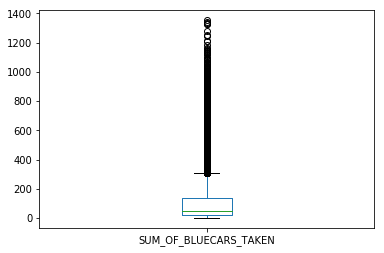

In [103]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot(kind='box')

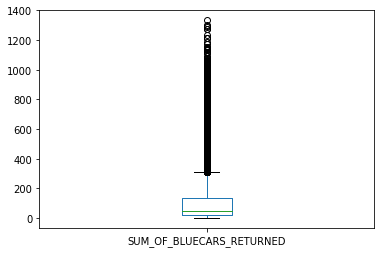

In [104]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot(kind='box')

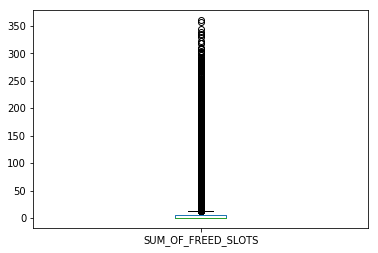

In [105]:
autolib_dataset['SUM_OF_FREED_SLOTS'].plot(kind='box')

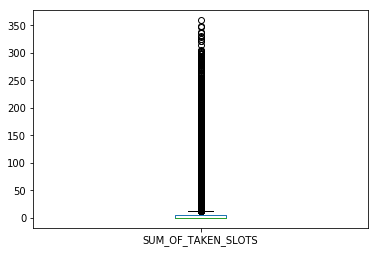

In [106]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot(kind='box')

The dataset has no outliers and so thewre is no need of dropping any values.

#UNIVARIATE ANALYSIS.

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

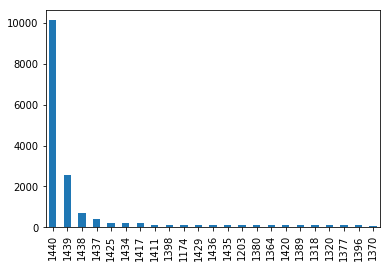

In [18]:
autolib_dataset['DAILY_DATA_POINTS'].value_counts().plot.bar()

1440 are the most datapoints aggregated on a daily basis.

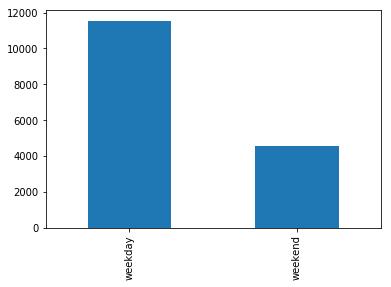

In [67]:
autolib_dataset['DAY_TYPE'].value_counts().head(10).plot.bar()

Weekdays have the most cars operating, could be because of working days

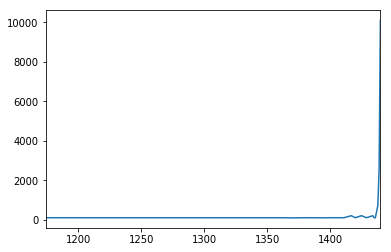

In [68]:
autolib_dataset['DAILY_DATA_POINTS'].value_counts().sort_index().plot.line()

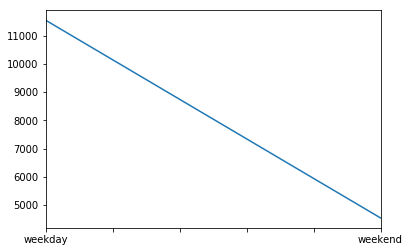

In [107]:
autolib_dataset['DAY_TYPE'].value_counts().sort_index().plot.line()

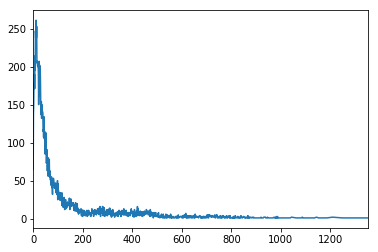

In [71]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].value_counts().sort_index().plot.line()

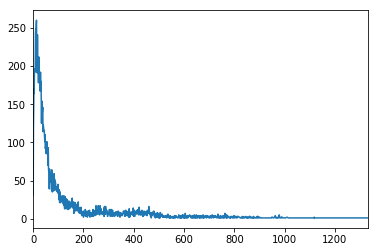

In [72]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].value_counts().sort_index().plot.line()

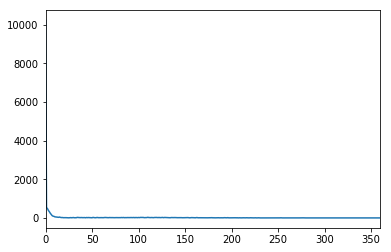

In [73]:
autolib_dataset['SUM_OF_FREED_SLOTS'].value_counts().sort_index().plot.line()

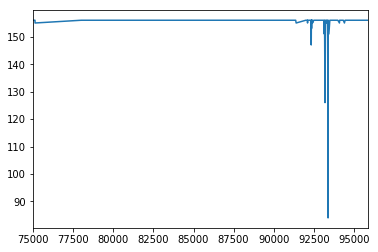

In [74]:
autolib_dataset['POSTAL_CODE'].value_counts().sort_index().plot.line()

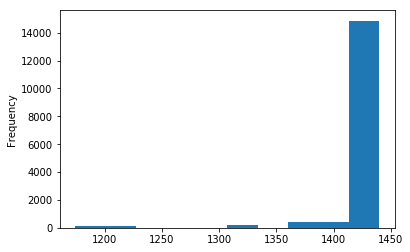

In [75]:
autolib_dataset['DAILY_DATA_POINTS'].plot.hist()


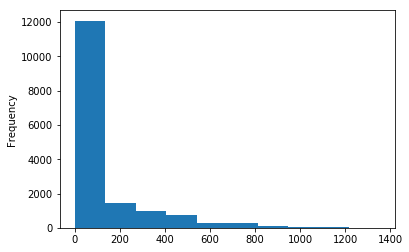

In [76]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot.hist()


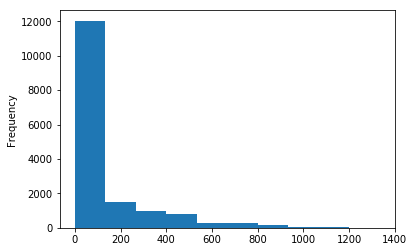

In [77]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot.hist()

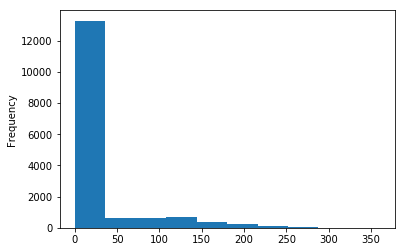

In [78]:
autolib_dataset['SUM_OF_FREED_SLOTS'].plot.hist()

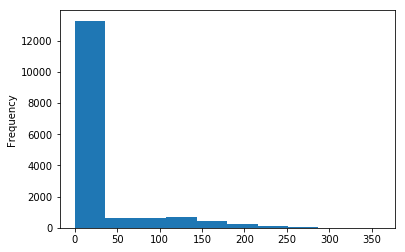

In [79]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot.hist()

#BIVARIATE ANALYSIS.

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis.It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Bivariate analysis can be helpful in testing simple hypotheses of association. Bivariate analysis can help determine to what extent it becomes easier to know and predict a value for one variable (possibly a dependent variable) if we know the value of the other variable (possibly the independent variable).

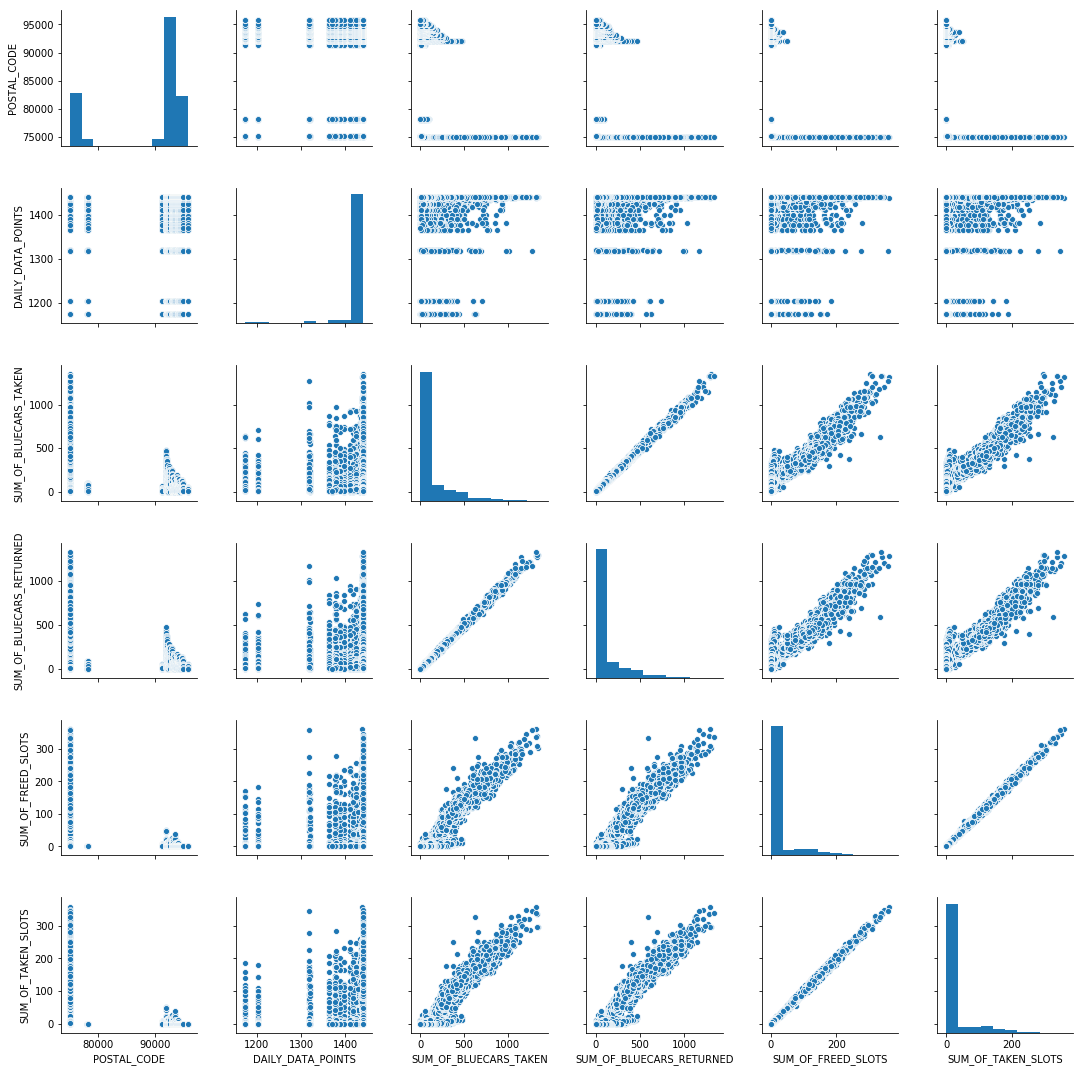

In [140]:
#Visualization of the general data with different columns
sns.pairplot(autolib_dataset)

The charts above show bivariate relationships between different columns.

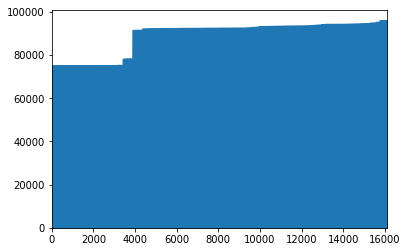

In [80]:
autolib_dataset['POSTAL_CODE'].plot.area()

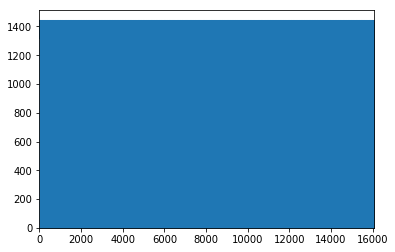

In [81]:
autolib_dataset['DAILY_DATA_POINTS'].plot.area()

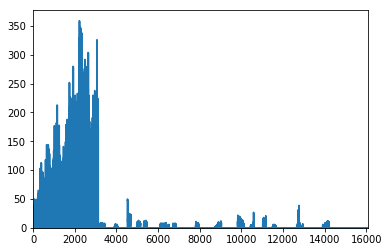

In [82]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot.area()

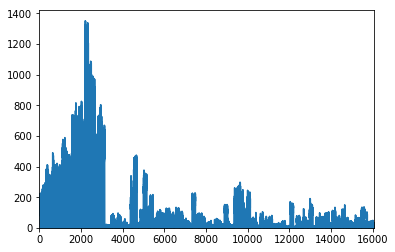

In [83]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot.area()

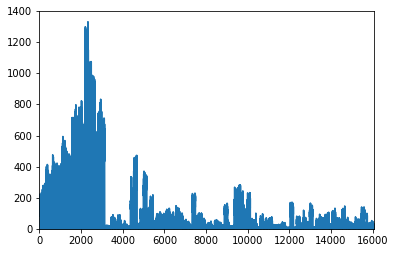

In [84]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot.area()

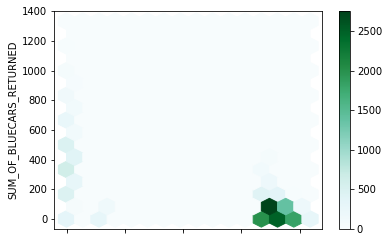

In [141]:
autolib_dataset.plot.hexbin(x='POSTAL_CODE', y='SUM_OF_BLUECARS_RETURNED', gridsize=15)

The sum of bluecars returned are above 2500 of them.

In [142]:
autolib_stat = autolib_dataset.groupby('POSTAL_CODE').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat.head()

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
POSTAL_CODE,,,,
75001,134.583333,134.448718,22.423077,22.371795
75002,173.993590,173.903846,35.070513,35.089744
75003,238.384615,238.166667,61.173077,61.179487
75004,201.628205,201.596154,46.371795,46.397436
75005,306.192308,306.108974,91.423077,91.333333


Postal code 75015 has the highest mean in terms of blue cars 

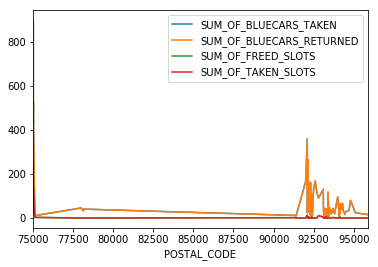

In [109]:
#Plotting line graphs of postal codes
autolib_stat.plot.line()

The sum of taken slots drops at first and stays constant among almost all the postal codes.

In [143]:
autolib_stat1 = autolib_dataset.groupby('DAY').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat1

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
DAY,,,,
Friday,127.056803,125.948481,22.960370,23.000440
Monday,111.159646,111.545072,19.807077,19.826453
Thursday,116.052469,115.944004,21.252205,21.174162
Tuesday,110.850614,110.228523,19.930174,19.876851
Wednesday,115.453704,114.935185,20.869048,20.821429


Friday has the highest mean value of blue cars taken, returned and the slots.
This means that friday is the busiest day of the week.

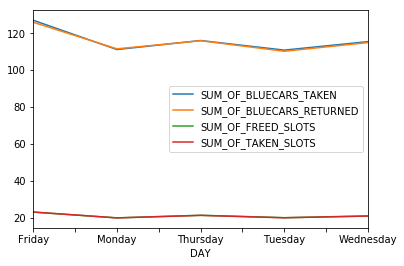

In [111]:
autolib_stat1.plot.line()

The line graphs clearly show that activity and the sum of taken slots records the smallest mean.

In [112]:
weekday_df = autolib_dataset[autolib_dataset['DAY_TYPE'] == 'weekday']
weekday_df.head()

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


In [113]:
autolib_stat2 = autolib_dataset.groupby('DAY').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat2

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
DAY,,,,
Friday,127.056803,125.948481,22.960370,23.000440
Monday,111.159646,111.545072,19.807077,19.826453
Thursday,116.052469,115.944004,21.252205,21.174162
Tuesday,110.850614,110.228523,19.930174,19.876851
Wednesday,115.453704,114.935185,20.869048,20.821429


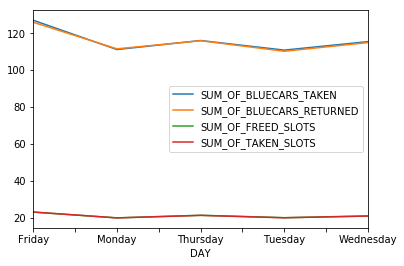

In [114]:
autolib_stat2.plot.line()

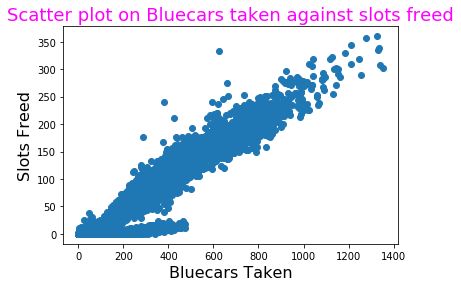

In [115]:
#checking the relationship between blue cars taken and slots freed
plt.scatter(autolib_dataset.SUM_OF_BLUECARS_TAKEN,autolib_dataset.SUM_OF_FREED_SLOTS)
plt.title("Scatter plot on Bluecars taken against slots freed",fontsize =18,color = 'magenta')
plt.xlabel("Bluecars Taken",fontsize =16)
plt.ylabel("Slots Freed",fontsize =16)
plt.show()

A clear positive correlation between the blue cars taken and the slots freed.

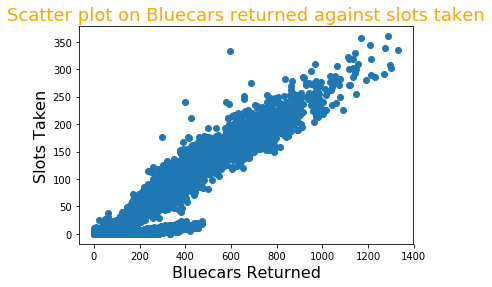

In [116]:
#checking the relationship between blue cars returned and slots taken
plt.scatter(autolib_dataset.SUM_OF_BLUECARS_RETURNED,autolib_dataset.SUM_OF_FREED_SLOTS)
plt.title("Scatter plot on Bluecars returned against slots taken",fontsize =18,color = 'orange')
plt.xlabel("Bluecars Returned",fontsize =16)
plt.ylabel("Slots Taken",fontsize =16)
plt.show()

A clear positive correlation between the blue cars returned and the slots taken.

In [117]:
#Checking for the unique values of day of week
autolib_dataset.DAY.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', nan],
      dtype=object)

#MULTIVARIATE ANALYSIS.

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. In design and analysis, the technique is used to perform i.e trade studies across multiple dimensions while taking into account the effects of all variables on the responses of interest.

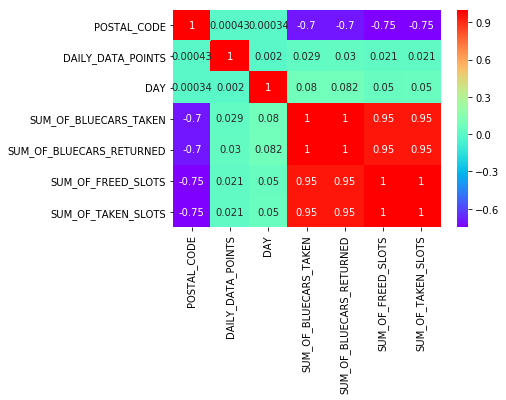

In [94]:
#checking for correlation between different variables using heatmap
sns.heatmap(autolib_dataset.corr(),annot=True,cmap='rainbow')

There is high correlation in both blue cars taken and blue cars returned and  slots taken and slots freed.

#SAMPLING.

Sampling is a process used in statistical analysis in which a predetermined number of observations are taken from a larger population. The methodology used to sample from a larger population depends on the type of analysis being performed but may include simple random sampling or systematic sampling.


Stratified random sampling is a method of sampling that involves the division of a population into smaller groups known as strata. In stratified random sampling or stratification, the strata are formed based on members' shared attributes or characteristics.

In [148]:
#Stratified sampling
autolib_sample_df= autolib_dataset.groupby('DAY',group_keys=False).apply(lambda x : x.sample(frac = 0.3))
autolib_sample_df.head()

,POSTAL_CODE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
13890,94140,1438,Friday,weekday,57,63,0,0
11732,93360,1434,Friday,weekday,20,22,0,0
6537,92230,1438,Friday,weekday,73,63,0,0
8220,92350,1435,Friday,weekday,23,27,0,0
6991,92260,1440,Friday,weekday,33,22,0,0


In [150]:
#Getting the sample mean and sample standard deviation
samp_mean_taken = autolib_sample_df.SUM_OF_BLUECARS_TAKEN.mean()
samp_mean_returned = autolib_sample_df.SUM_OF_BLUECARS_RETURNED.mean()
samp_std_taken = autolib_sample_df.SUM_OF_BLUECARS_TAKEN.std()
samp_std_returned = autolib_sample_df.SUM_OF_BLUECARS_RETURNED.std()
print("Sample mean of blue cars taken",samp_mean_taken)
print("Sample mean of blue cars returned",samp_mean_returned)
print("Sample standard deviation of blue cars taken",samp_std_taken)
print("Sample standard deviation of blue cars returned",samp_std_returned)

Sample mean of blue cars taken 116.62478336221837
Sample mean of blue cars returned 116.25043327556325
Sample standard deviation of blue cars taken 170.31306692885073
Sample standard deviation of blue cars returned 168.9176533489906


#Probability.

In [0]:
from scipy.stats import poisson

In [158]:
#The probability that 117 bluecars were taken  on Friday 
Friday = autolib_sample_df[autolib_sample_df.DAY == "Friday"]

Taken_On_Friday  = Friday.SUM_OF_BLUECARS_TAKEN.mean()
poisson.pmf(117,Taken_On_Friday)

0.03530439512391427

#EXPLORATORY DATA ANALYSIS.

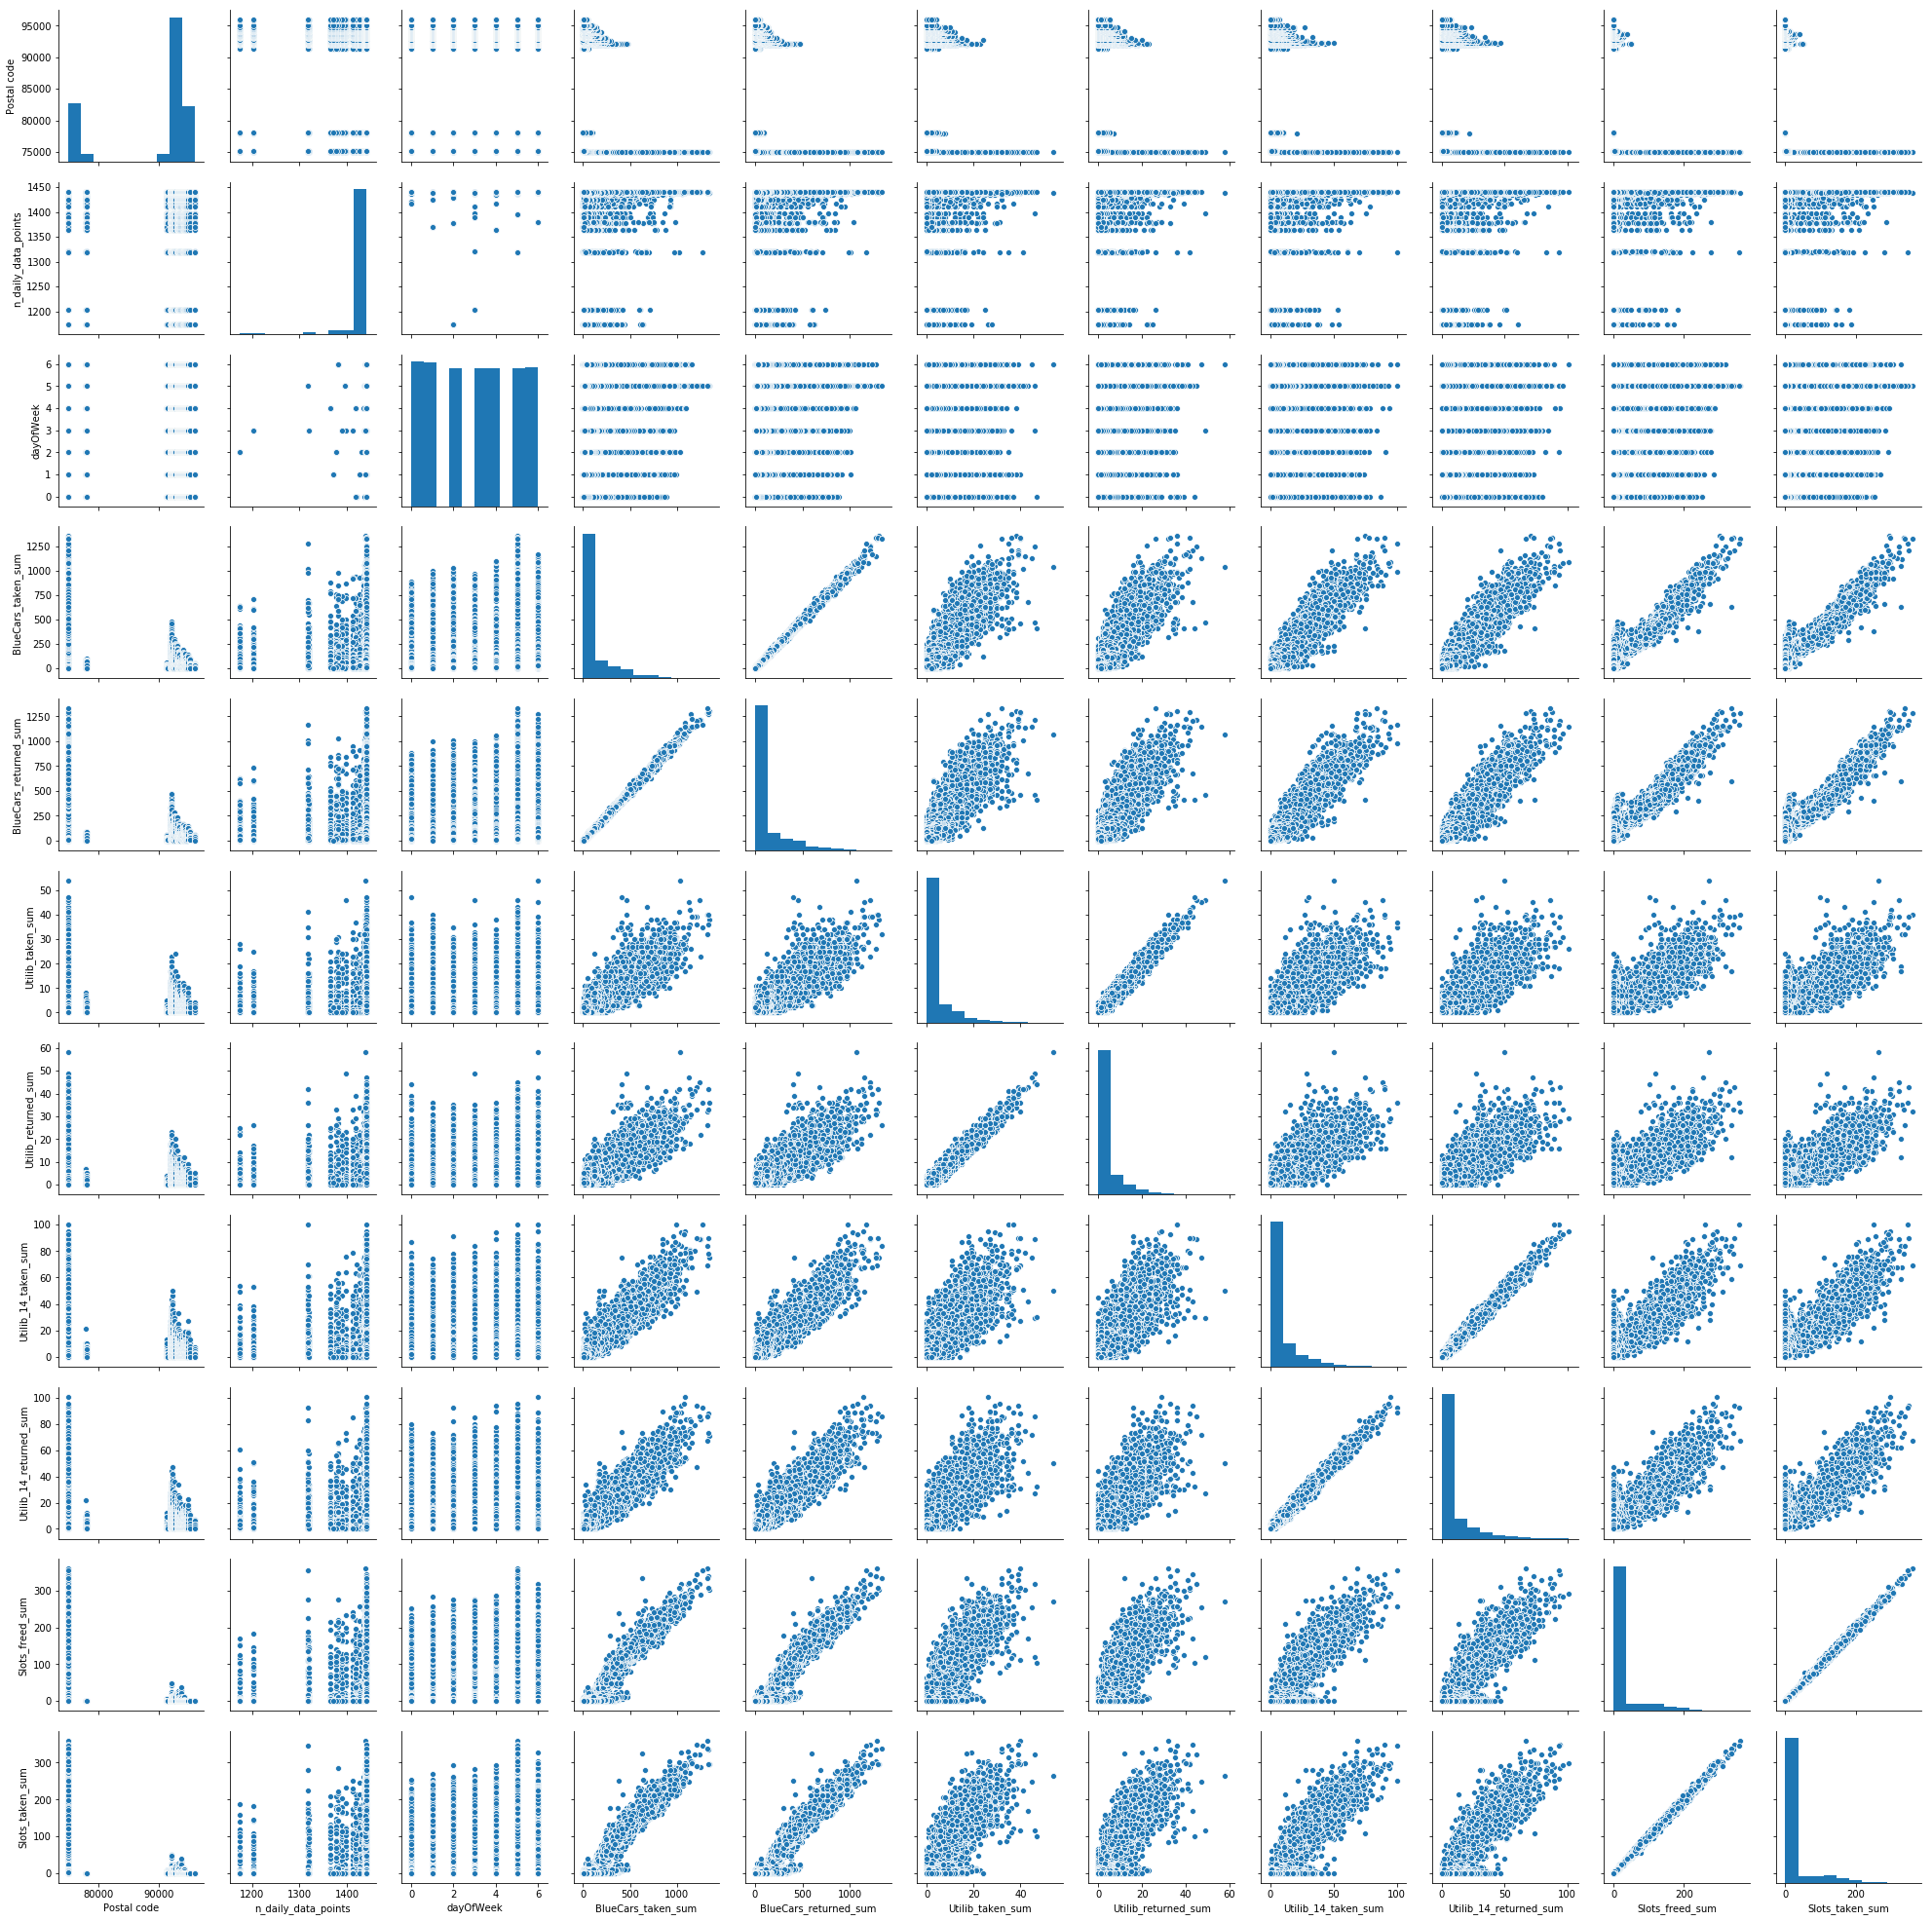

In [25]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_dataset)
